In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mta = np.load('MTA_Fare.npy')
mta = mta.astype('float')
print mta[1]
mta.shape

[[  1.62100000e+04   2.01790000e+04   2.17690000e+04 ...,  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00]
 [  5.03000000e+02   6.47000000e+02   6.65000000e+02 ...,  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00]
 [  4.10000000e+01   4.30000000e+01   4.40000000e+01 ...,  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00]
 [ -1.00000000e+00  -1.00000000e+00  -1.00000000e+00 ...,  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00]]


(600L, 23L, 194L)

In [3]:
#since -1 is the number assigned to missing values, I will replace those values with NaN:
mta[mta==-1] = np.nan
print mta[1]

[[ 16210.  20179.  21769. ...,     nan     nan     nan]
 [   503.    647.    665. ...,     nan     nan     nan]
 [    41.     43.     44. ...,     nan     nan     nan]
 ..., 
 [     0.      0.      0. ...,     nan     nan     nan]
 [     0.      0.      0. ...,     nan     nan     nan]
 [    nan     nan     nan ...,     nan     nan     nan]]


In [4]:
#ridetypes
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
#dates
mta_dates = pd.date_range('05/21/2010', periods=194, freq='W')
mta_dates.shape

(194L,)

##Task 1:
###Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
###Identify it and figure out what it is due to.

In [5]:
#sum for for all ride types
mta_allsum = np.nansum(mta, axis=1)
print (mta_allsum.shape)

(600L, 194L)


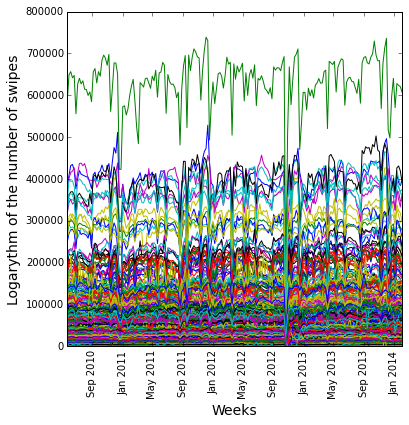

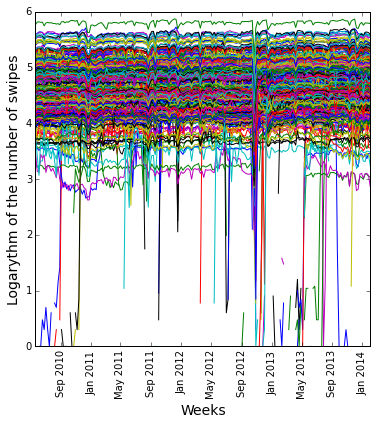

In [6]:
plt.figure(figsize=(6, 6), dpi=200)
ax = pl.plot(mta_dates, np.transpose(mta_allsum))
pl.ylabel('Number of swipes', fontsize = 14)
pl.xlabel('Weeks', fontsize = 14)
pl.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(6, 6), dpi=200)
ax = pl.plot(mta_dates, np.transpose(np.log10(mta_allsum)))
pl.ylabel('Logarythm of the number of swipes', fontsize = 14)
pl.xlabel('Weeks', fontsize = 14)
pl.xticks(rotation = 90)
plt.show()

UP: Number of swipes vs Weeks for all the Metro Statios. Down: Logarythm of the number of swupes vs Weeks for all the Metro Stations

In [7]:
#For a best visualization, I will sum for all the stations too. So, mta_allsum2 contains the sum of swipes for all types of rides
#in all stations. 
mta_allsum2 = np.nansum(mta, axis=(0,1))

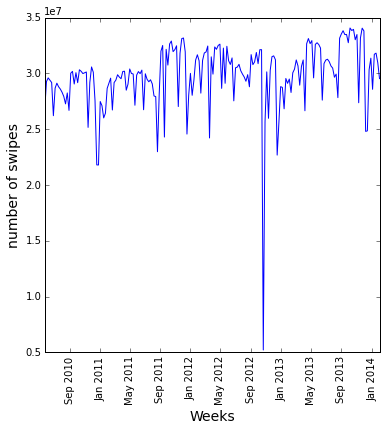

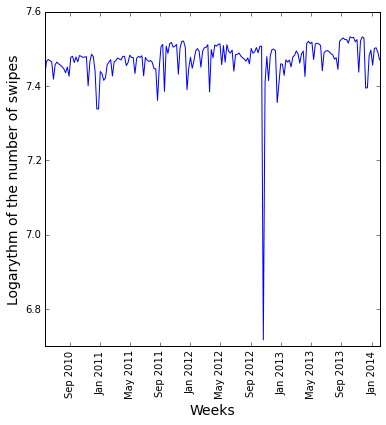

In [8]:
plt.figure(figsize=(6, 6), dpi=200)
ax = pl.plot(mta_dates, np.transpose(mta_allsum2))
pl.ylabel('number of swipes', fontsize = 14)
pl.xlabel('Weeks', fontsize = 14)
pl.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(6, 6), dpi=200)    
ax = pl.plot(mta_dates, np.transpose(np.log10(mta_allsum2)))
pl.ylabel('Logarythm of the number of swipes', fontsize = 14)
pl.xlabel('Weeks', fontsize = 14)
pl.xticks(rotation = 90)
plt.show()

Up: Number of swipes vs Weeks for the sum of all the metro stations in NYC, Down: Logarythm of the number of swips vs Weeks of all the metro stations in NYC

In [9]:
threshold_up = np.nanmean(mta_allsum2) + 3*np.nanstd(mta_allsum2)
threshold_down=np.nanmean(mta_allsum2) - 3*np.nanstd(mta_allsum2)
#Events
events = [ np.where(mta_allsum2 < threshold_down)   for i,val in enumerate(mta_allsum2)]
print '%s is an event'% mta_dates[events[0][0]][0]

2012-10-21 00:00:00 is an event


According to this analysis, 2012-10-21 registered a significant drop in the number of rides due to Hurricane Sandy

##Task 2:
###Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [10]:
#same as we did above, now using ridertype, so we sum on axis = 0, which refers to the 23 types
mta_rtype = np.nansum(mta, axis=0)
mta_rtype.shape

(23L, 194L)

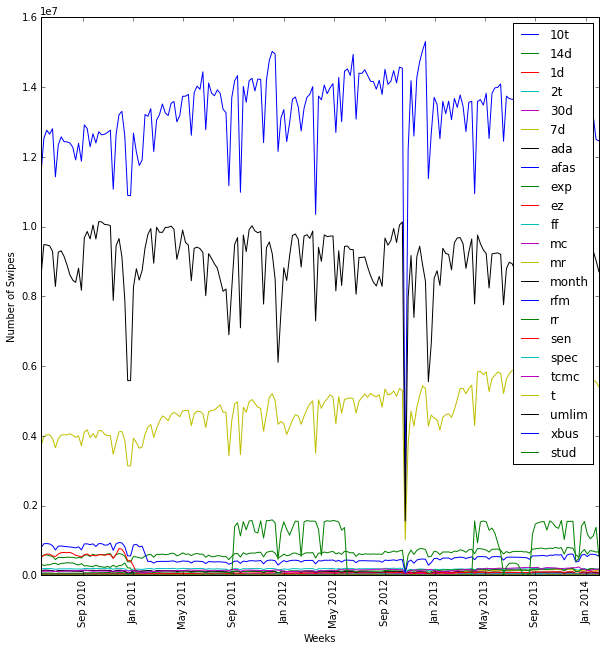

In [11]:
plt.figure(figsize=(10, 10), dpi=200)
#figsize=(100,100)
ax = pl.plot(mta_dates, np.transpose(mta_rtype))
pl.ylabel('Number of Swipes')
pl.xlabel('Weeks')
pl.xticks(rotation = 90)
pl.legend(ridetype)

Figure: number of rides vs Weeks for every type of ride in NYC metro. 

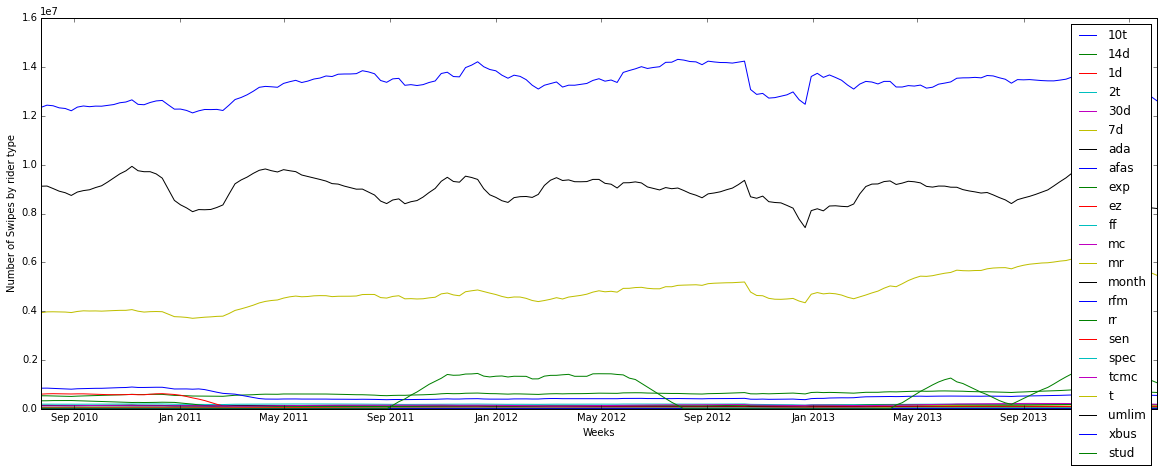

In [13]:
#use the rolling mean to smooth the timeseries
plt.figure(figsize=(20,7), dpi=200)
smooth = pd.rolling_mean(np.transpose(mta_rtype), 10)
ax = pl.plot(mta_dates, smooth)
pl.ylabel('Number of Swipes by rider type')
pl.xlabel('Weeks')
pl.legend(ridetype)

Figure: number of rides vs Weeks for every type of ride in NYC metro, smoothed courved with rolling means

In [14]:
#Calculate the ratios:
ratio = smooth[9,:]/smooth[193,:]
#I will look at the ratios in a nice way 
pdratio = pd.DataFrame(ratio,index=ridetype, columns=['ratio'])
pdratio

,ratio
10t,0.978667
14d,0.798681
1d,0.899810
2t,1.070889
30d,0.967317
7d,0.719555
ada,1.111307
afas,4774.478261
exp,93571.342857
ez,665798.555556


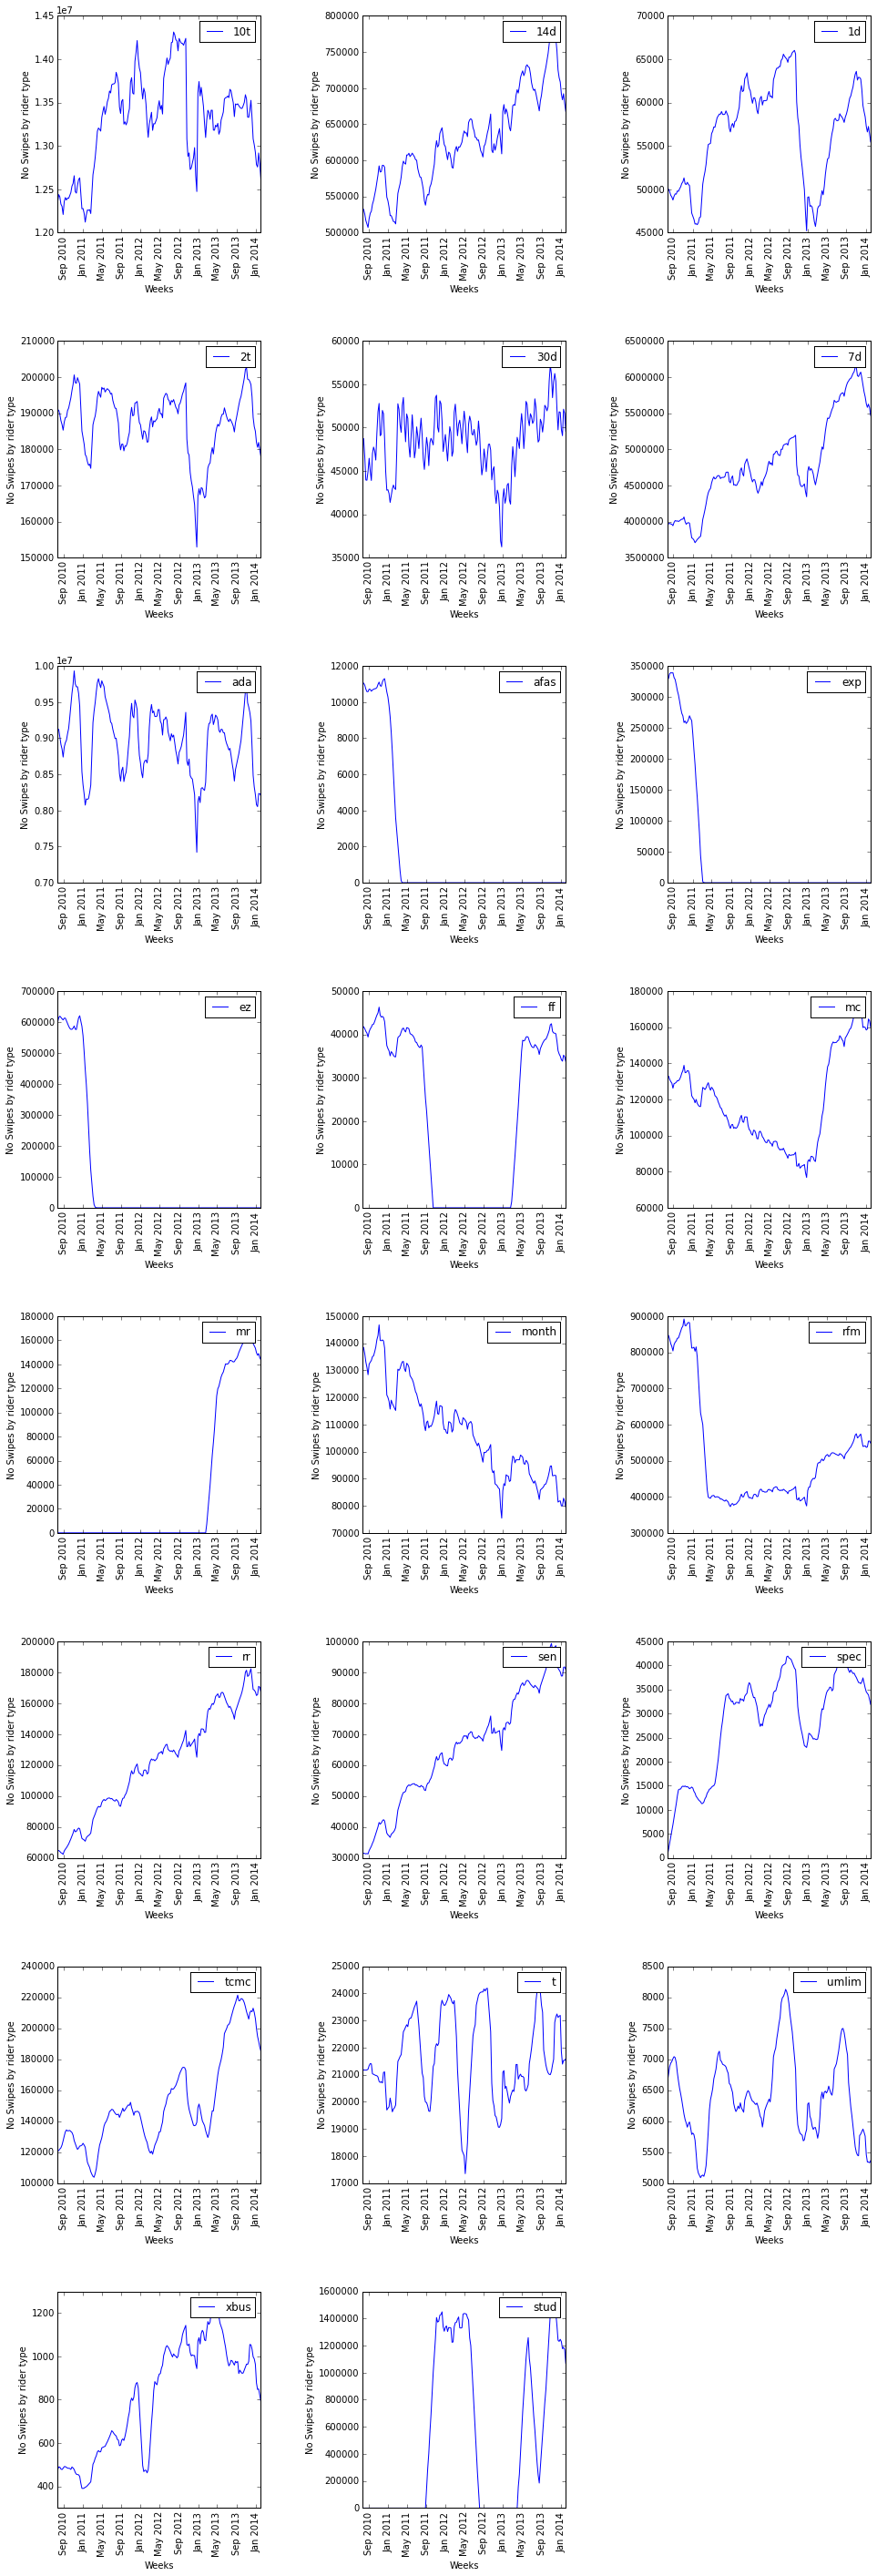

In [15]:
#Calculate the ratios:
ratio = smooth[9,:]/smooth[193,:]
#I will look at the ratios in a nice way 
pdratio = pd.DataFrame(ratio,index=ridetype, columns=['ratio'])
n=0
plt.figure(figsize=(16, 16), dpi=200)
for ratio in ratio:
    pl.subplot(8,3,n+1)
    ax = pl.plot(mta_dates, smooth[:, n])
    pl.legend(ridetype[n:])
    pl.ylabel('No Swipes by rider type')
    pl.xlabel('Weeks')
    pl.xticks(rotation = 90)
    pl.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=2.5)
    n+=1

Figure: Number of swipes by type of ride vs weeks.

By looking at this graphs, one can say that there are certain type of riders whose number follows a steady trend. 
The types: 14d, 7d, month, rr, sen, spec, tcmc show a steady trend. Also, there are certain types that showed a steady trend somewhere in time, but not for every week, for example: afas, exp, ez, mr; for those the ratio number may not reflect a steady trend.  

In [17]:
trends=['14d', '7d', 'month', 'rr', 'sen', 'spec', 'tcmc']
for tr in trends:
    print '%s show a rate of %f.' % (tr, pdratio.loc[tr][0])

14d show a rate of 0.798681.
7d show a rate of 0.719555.
month show a rate of 1.727944.
rr show a rate of 0.385660.
sen show a rate of 0.343714.
spec show a rate of 0.014249.
tcmc show a rate of 0.652626.


From those numbers, one can see that month is the only type of pass that has incresed steadly during time

##Task 3:
###Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [18]:
#I will take the "score" of each station's transform. I define this score as the difference between the max and the std
#this will tell me how above is the max from the standard deviation.
score=[]
for i in range(len(mta_allsum)):
    trans=np.abs(np.fft.rfft(mta_allsum[i]))
    score.append(np.max(trans)-np.std(trans))
               
scframe = pd.DataFrame(score, columns=['score'])
scframe.sort(['score'],ascending=False).head()

,score
169,1.099085e+08
21,7.069606e+07
45,6.897360e+07
83,6.872736e+07
32,6.812478e+07


According to this analysis, the 4 stations that showed the most prominent periodic trend on an annual period are: 169, 21, 45, and 83